In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Load the YOLOv8 model
model = YOLO('best1.pt')

# Open the video file
video_path = "WHATSAAP ASSIGNMENT.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    count = 0
    busketball_y=0
    person_y=0
    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame,classes=[0,1])
        frame= results[0]
        image = frame.orig_img
        corrs = frame.boxes.xyxy.tolist()
        classes = np.array(frame.boxes.cls)
        for cor,cls in zip(corrs,classes):
            if cls==0:
                busketball_y = int((int(cor[1])+int(cor[3]))/2)
                cv2.rectangle(image, (int(cor[0]),int(cor[1])),(int(cor[2]),int(cor[3])), (0,255,0), 1)
                cv2.circle(image, (int((int(cor[0])+int(cor[2]))/2),int((int(cor[1])+int(cor[3]))/2)), 2, (0,255,0), 1)
                cv2.putText(image,'busketball', (int(cor[0]),int(cor[1])), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 1)
            elif cls==1:
                person_y = int(cor[3])
                cv2.rectangle(image, (int(cor[0]),int(cor[1])),(int(cor[2]),int(cor[3])), (0,0,255), 1)
                cv2.circle(image, (int((int(cor[0])+int(cor[2]))/2),int((int(cor[1])+int(cor[3]))/2)), 2, (0,0,255), 1)
                cv2.putText(image,'person', (int(cor[0]),int(cor[1])), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 1)
            if busketball_y>person_y:
                count+=1
            # cv2.rectangle(image, (inx1,iny1),(inx2,iny2), (0,255,0), 1)
            # cv2.rectangle(image, (outx1,outy1),(outx2,outy2), (255,0,0), 1)
            
            # Visualize the results on the frame
        # annotated_frame = results[0].plot()
            cv2.putText(image,str(count), (50,110), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 1)
        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 640x384 1 busketball, 1 person, 212.6ms
Speed: 6.0ms preprocess, 212.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 busketball, 1 person, 229.6ms
Speed: 7.0ms preprocess, 229.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 busketball, 1 person, 181.0ms
Speed: 7.0ms preprocess, 181.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 busketball, 1 person, 184.0ms
Speed: 7.0ms preprocess, 184.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 busketball, 1 person, 213.0ms
Speed: 5.0ms preprocess, 213.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 busketball, 1 person, 185.0ms
Speed: 7.0ms preprocess, 185.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 busketball, 1 person, 201.6ms
Speed: 4.0ms preprocess, 201.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 64

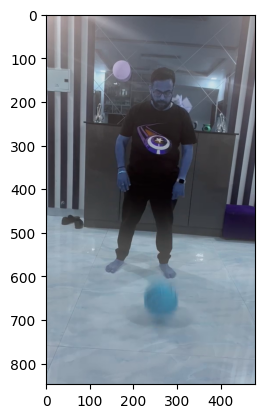

In [4]:
cap = cv2.VideoCapture("WHATSAAP ASSIGNMENT.mp4")  # video_name is the video being called
cap.set(1,250)  # Where frame_no is the frame you want
ret, frame = cap.read()
plt.imshow(frame)

In [5]:
# Load a model
model = YOLO('best1.pt')  # load an official detection model
# model = YOLO('yolov8n-seg.pt')  # load an official segmentation model
# model = YOLO('path/to/best.pt')  # load a custom model

# Track with the model
results = model(frame)


0: 640x384 1 busketball, 1 person, 365.0ms
Speed: 10.0ms preprocess, 365.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)


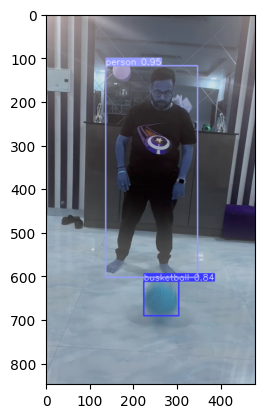

In [6]:
plt.imshow(results[0].plot())

In [13]:
results[0].boxes.cls

tensor([1., 0.])

In [19]:
import cv2 
import numpy as np 
  
cap = cv2.VideoCapture("WHATSAAP ASSIGNMENT.mp4") 
lower = np.array([22, 93, 0])
upper = np.array([45, 255, 255])
while 1: 
    ret,frame =cap.read()  
    # ret will return a true value if the frame exists otherwise False 
    into_hsv =cv2.cvtColor(frame,cv2.COLOR_BGR2HSV) 
    # changing the color format from BGr to HSV  
    # This will be used to create the mask 
    # L_limit=np.array([22, 93, 0])
    L_limit=np.array([22, 100, 20]) # setting the blue lower limit 
    U_limit=np.array([45, 200, 200]) # setting the blue upper limit 
         
  
    b_mask=cv2.inRange(into_hsv,L_limit,U_limit) 
    # mask = cv2.inRange(into_hsv, lower, upper)

    cnts = cv2.findContours(b_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (36,255,12), 2)

    cv2.imshow('mask', frame)
    # creating the mask using inRange() function 
    # this will produce an image where the color of the objects 
    # falling in the range will turn white and rest will be black 
    # blue=cv2.bitwise_and(frame,frame,mask=b_mask) 
    # this will give the color to mask. 
    # cv2.imshow('Original',frame) # to display the original frame 
    # cv2.imshow('Blue Detector',blue) # to display the blue object output 
  
    if cv2.waitKey(1) & 0xFF == ord("q"): 
        break
    # this function will be triggered when the ESC key is pressed 
    # and the while loop will terminate and so will the program 
cap.release() 
  
cv2.destroyAllWindows() 

In [26]:
import cv2
import imutils
import time

greenLower = (22, 93, 0)
greenUpper = (45, 255, 255)

vs = cv2.VideoCapture("WHATSAAP ASSIGNMENT.mp4")
time.sleep(2.0)
count=0
centers_y = [0,1]
while True:
    _, frame = vs.read()

    if frame is None:
        break
    # if _:
    #     results = model(frame,classes=[0])
    #     frame1= results[0]
    #     image = frame1.orig_img
    #     corrs = frame1.boxes.xyxy.tolist()
    #     for cor in corrs:
    #         cv2.rectangle(frame, (int(cor[0]),int(cor[1])),(int(cor[2]),int(cor[3])), (0,255,0), 2)
    #         # cv2.rectangle(image, (inx1,iny1),(inx2,iny2), (0,255,0), 1)
    #         # cv2.rectangle(image, (outx1,outy1),(outx2,outy2), (255,0,0), 1)
    #         cv2.circle(frame, (int((int(cor[0])+int(cor[2]))/2),int((int(cor[1])+int(cor[3]))/2)), 2, (0,255,0), 1)
        # Visualize the results on the frame
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    width, height = frame.shape[:2]
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, greenLower, greenUpper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    center = None
    
    if len(cnts) > 0:
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        centers_y.append(int(M["m01"] / M["m00"]))

        if centers_y[-1]<centers_y[-2] and centers_y[-3]>centers_y[-2]:
            count+=1
        # To see the centroid clearly
        if radius > 10:
            cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 5)
            cv2.imwrite("circled_frame.png", cv2.resize(frame, (int(height / 2), int(width / 2))))
            cv2.circle(frame, center, 5, (0, 0, 255), -1)
    # cv2.line(frame, (0,400), (400,400), (50,50,50), 1)
    cv2.putText(frame, f"count{count}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)

    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vs.release()
cv2.destroyAllWindows()

In [23]:
centers_y

[0, 1, 378.0677795410156]

In [5]:
greenLower = (22, 93, 0)
greenUpper = (45, 255, 255)
cap = cv2.VideoCapture("WHATSAAP ASSIGNMENT.mp4")  # video_name is the video being called
cap.set(1,22)  # Where frame_no is the frame you want
ret, frame = cap.read()
blurred = cv2.GaussianBlur(frame, (11, 11), 0)
width, height = frame.shape[:2]
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
center = None

if len(cnts) > 0:
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

    # To see the centroid clearly
    if radius > 10:
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 5)
        cv2.imwrite("circled_frame.png", cv2.resize(frame, (int(height / 2), int(width / 2))))
        cv2.circle(frame, center, 5, (0, 0, 255), -1)

# cv2.imshow("Frame", frame)
plt.imshow(frame)

NameError: name 'imutils' is not defined

In [ ]:
import cv2
import mediapipe as mp

# Create an instance of the MediaPipe Hands object
mp_hands = mp.solutions.hands.Hands()

# Process the video frame
frame = cv2.imread("image.jpg")

# Convert the image to RGB
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Run the MediaPipe Hands model on the image
results = mp_hands.process(image)

# Draw the hand landmarks on the image
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# Display the image
cv2.imshow("Hand Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

  Using cached mediapipe-0.10.9-cp39-cp39-win_amd64.whl (50.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
  Using cached cffi-1.16.0-cp39-cp39-win_amd64.whl (181 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'e:\\jupyter\\yolov8\\yolov8_env\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import mediapipe as mp

ModuleNotFoundError: No module named 'mediapipe'